In [1]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [9.0, 6.0]

# Session 3: Text Classification and Topic Modeling 
**July 12, 2018**

In this session, we'll begin using machine learning techniques to broaden our text analytics. Now that we have a corpus of documents, we can start building topic models to determine if documents are similar to each other and how to categorize our documents broadly. We can also use text classification methods to create tools that allow us to model documents and utterances more precisely. We'll take a look at a specific kind of classification - sentiment analysis and how it can be used for engaging in deeper analytics. 

## Intro to Machine Learning 

In general, a learning problem considers a set of $n$ instances (or examples) that models are trained on. 

Instances are represented by a multidimensional entry (aka multivariate data) having several attributes or _features_.

The goal of the learning problem is to create a model that predicts a _target_ attribute or feature.

![Feature Space](figures/s3_feature_space.png)

The best way to think about machine learning is problems that use mathematical and statistical methods to find patterns in _high dimensional space_.

### Learning by Example

| Problem Domain                              | Machine Learning Class |
|---------------------------------------------|------------------------|
| Infer a function from labeled data          | Supervised learning    |
| Discover structure of data without feedback | Unsupervised learning  |
| Interact with environment towards a goal    | Reinforcement learning |

_Given examples (data) extract a meaningful pattern upon which to act._

### Algorithms by Output 

| Type of Output                              | Algorithm Category              |
|---------------------------------------------|---------------------------------|
| **Output is one or more discrete classes**  | **Classification (Supervised**) |
| **Output is continuous**                    | **Regression (Supervised)**     |
| **Output is membership in a similar group** | **Clustering (Unsupervised)**   |
| Output is the distribution of inputs        | Density Estimation              |
| Output is simplified from higher dimensions | Dimensionality Reduction        |

_Use training data to fit a model which is then used to predict incoming inputs._

### Classification 

![Classification](figures/s3_classification.png)

Given labeled input data (with two or more labels), fit a function that can determine for any input, what the label is. 

### Regression 

![Regression](figures/s3_regression.png)

Given continuous input data fit a function that is able to predict the continuous value of input given other data.

### Clustering 

![Clustering](figures/s3_clustering.png)

Given data, determine a pattern of associated data points or clusters via their similarity or distance from one another.

## The Bag of Words Model 

In order to do words on machine learning, therefore - we need to represent text numerically somehow.  

![Bag of Words](figures/s3_bag_of_words.png)

We've already noted that words co-occurring together demonstrate statistical significance that might be related to meaning. The bag-of-words model takes advantage of this to create a model that relies on numeric representations of words that are located close together. 

## Vectorization 

Also called feature-extraction; the process of transforming text documents into numeric representations (vectors) that can be used to do machine learning.

![Vector Encoding](figures/s3_vector_encoding.png)

The common method of vectorization is to take the _vocabulary_ of the corpus and order them lexicographically (in alphabetical order). To transform a document into a vector, we simply assign a number for each word that represents the word's relationship to the document.

### One Hot Encoding 

![One Hot Encoding](figures/s3_one_hot_encoding.png)

The simplest method is one-hot-encoding where we simply assign a 1 if the word exists in the document, or a 0 otherwise. This is a very common encoding that is generally used in artificial neural networks.

### Frequency Encoding 

![Frequency Encoding](figures/s3_frequency_encoding.png)

If we believe that the number of times a word appears in a document matters, we can simply count the number of occurrences and use that number in the word's vector position.

### TF-IDF 

![TF-IDF](figures/s3_tfidf_encoding.png)

Term-Frequency, Inverse-Document-Frequency is a measure of a word's relative importance to the document, given its frequency in the entire corpus. 

### word2vec 

![Distributed Representations](figures/s3_distributed_representation.png)

The current state of the art is called _word embeddings_. This representation computes a word vector based on word similarity; e.g. "king" and "queen" will be closer together than "red" and "banana". 

## Scikit-Learn 

Scikit-Learn is a Python package that provides an class-based API for _generalized machine learning_ -- implementing a significant number of algorithms for machine learning as well as utilities for feature extraction, evaluation, etc. 

### Estimators 

Object-oriented interface centered around the concept of an Estimator: 

> “An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.”

&mdash; Scikit-Learn Tutorial


| Object        | Defining Method    | Description                                                       |
|---------------|--------------------|-------------------------------------------------------------------|
| Estimator     | `fit(X, y=None)`   | Train the estimator to learn from data X (and y if supervised).   |
| Transformer   | `transform(X)`     | Transform dataset `X` into `X'` (e.g. for feature extraction).    |
| Predictor     | `predict(X)`       | Given test data `X` return predictions `yhat`                     |
| Probabilistic | `predict_proba(X)` | Returns the probability for all possible `yhat` values            |
| Scorer        | `score(X, y=None)` | Given test data with known answers (y) return performance metric. |

- `X`: 2D array-like of shape `(n_instances, n_features)`  
- `y`: 1D array-like of shape `(n_instances,)` (optional)

### Pipelines 

![Text Pipeline](figures/s3_text_pipelines.png)

```python
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.feature_extraction.text import CountVectorizer, TfidifTransformer

pipeline = Pipeline([
  ('extract_essays', EssayExractor()),
  ('features', FeatureUnion([
    ('ngram_tf_idf', Pipeline([
      ('counts', CountVectorizer()),
      ('tf_idf', TfidfTransformer())
    ])),
    ('essay_length', LengthTransformer()),
    ('misspellings', MispellingCountTransformer())
  ])),
  ('classifier', MultinomialNB())
])
```

## Preliminaries for examples

1. Get `CorpusReader` to access our documents in categories
2. Create some utility functions for examples 

In [2]:
from utils.reader import PickledCorpusReader

# Create our corpus reader to access our data
corpus = PickledCorpusReader("data/corpus")

In [3]:
import random

from functools import partial 
from tabulate import tabulate 

tabulate = partial(tabulate, headers='firstrow', tablefmt='pipe')

def get_document(corpus, fileid):
    return next(corpus.raw_data(fileids=fileid))


def random_document(corpus, categories=None):
    fileid = random.choice(corpus.fileids(categories=categories))
    return fileid, get_document(corpus, fileid)


def fileids(index, corpus, categories=None):
    for idx in index:
        yield corpus.fileids(categories=categories)[idx]

## Topic Modeling 

Unsupervised methods of clustering related documents into _topics_ &mdash; e.g. find groups of related documents based on the terms that they contain. 

![Topic Modeling Pipeline](figures/s3_topic_modeling.png)

## Nearest Neighbors 

Similarity in feature space means _distance_ -- e.g. the closer two points are together, the more similar they are (and they are identical if they are the same point). Nearest neighbors selects the $k$ nearest documents by distance and returns them as the most similar to the given document. 

In [16]:
from sklearn.pipeline import Pipeline 
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer

model = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('neighbors', NearestNeighbors()), 
])

model.fit(corpus.raw_data(categories=["news"]))

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ize=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0))])

In [58]:
# Get random document 
# target_fileid, target_text = random_document(corpus, categories=["news"])

# Or use provided example 
target_fileid = 'news/571c19d2c1808103a0d8de39.pickle'
target_text = get_document(corpus, target_fileid)

print(target_text)

Prince ' s remains have been cremated , and a small group of family and friends held a private ceremony to honor the music legend , his publicist said Saturday .

Yvette Noel - Schure said in a statement that Prince ' s remains had been cremated without specifying when .
His body was released to his family Friday afternoon after a Minnesota medical examiner performed an autopsy .

" A few hours ago , Prince was celebrated by a small group of his most beloved : family , friends and his musicians , in a private , beautiful ceremony to say a loving goodbye ," Noel - Schure said in the statement .

The " final storage " of Prince ' s remains would remain private , but an announcement about a " musical celebration " is forthcoming , the statement said .

Prince was found dead at the age of 57 Thursday at his estate in Chanhassen , southwest of Minneapolis .
The cause of his death remains unknown .
Authorities said Friday that the results of the investigation into Prince ' s death , includin

In [23]:
# Note the use of [target_text]
target = model.named_steps['tfidf'].transform([target_text])
target

<1x34058 sparse matrix of type '<class 'numpy.float64'>'
	with 231 stored elements in Compressed Sparse Row format>

In [24]:
distances, index = model.named_steps['neighbors'].kneighbors(target)

# Unravel the single document
index = index.ravel()
distances = distances.ravel()

# Print a table with distances and index 
table = list(zip(fileids(index, corpus, categories=["news"]), index, distances))
table = [["File ID", "Index", "Distance"]] + table 
print(tabulate(table))

| File ID                              |   Index |    Distance |
|:-------------------------------------|--------:|------------:|
| news/571c19d2c1808103a0d8de39.pickle |     736 | 3.16101e-08 |
| news/571a3601c1808103a0d61a46.pickle |     720 | 0.867588    |
| news/571947eec1808103a0d49e5a.pickle |     707 | 0.976536    |
| news/57191af9c1808103a0d45563.pickle |     703 | 0.983616    |
| news/56f96207c1808147f082c2f3.pickle |     346 | 1           |


In [25]:
print(get_document(corpus, 'news/571a3601c1808103a0d61a46.pickle'))

Seven - time Grammy winner Prince , who was known for megahits like “ When Doves Cry ” and “ Purple Rain ,” has died at the age of 57 .

Prince was found dead in the elevator of his Paisley Park estate in Chanhassen , Minn . on Thursday .
Deputies and medical personnel found the music icon unresponsive when they arrived at his home and they performed CPR but it was unsuccessful .
He was pronounced dead at 10 : 07 a . m . local time .

A transcript of the 911 call from the compound shows confusion as an unidentified caller struggles to give the dispatcher the proper address .
The caller said he was at " Prince ' s house " but first placed it in Minneapolis .
Another person at the compound eventually gave the correct address in the suburb of Chanhassen .

The caller first says he has " someone who is unconscious " before saying " the person is dead here ."

As the dispatcher identifies the address as Paisley Park and begins to ask a question , the caller interrupts to say , " Yes , it ' 

## K-Means Clustering  

We can cluster our documents by separating them into $k$ groups that are relatively close together, defining the cluster by the _center_ or mean of all the vectors. We have to know how many clusters we want a priori but the algorithm is guaranteed to converge with stable centers. 

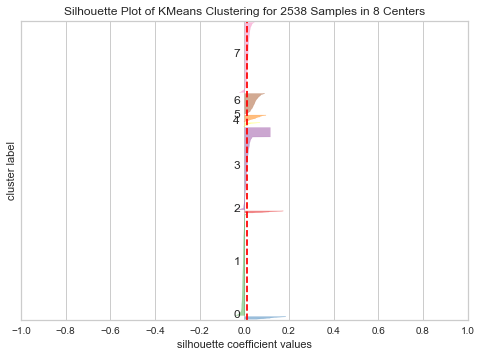

In [9]:
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer 

tfidf = TfidfVectorizer()
docs  = tfidf.fit_transform(corpus.raw_data())
model = KMeans(n_clusters=8)

silhouette = SilhouetteVisualizer(model)
silhouette.fit(docs)
silhouette.poof()

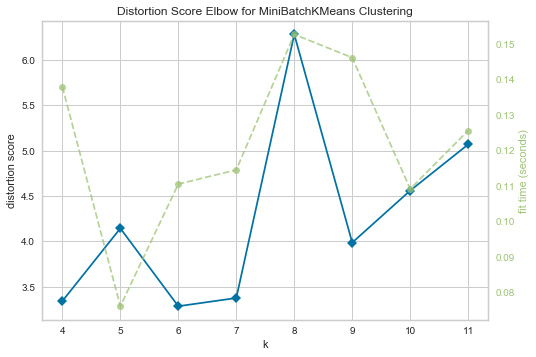

In [10]:
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer 

elbow = KElbowVisualizer(MiniBatchKMeans(), k=(4, 12))
elbow.fit(docs)
elbow.poof()

## Distance 

There are more ways than one to measure distance! 

![Distance Metrics](figures/s3_distance_table.png)

### Minkowski Distance 

![Minkowski Distance](figures/s3_minkowski.png)

### Mahalanobis Distance 

![Mahalanobis Distance](figures/s3_mahalanobis.png)

### Jaccard Distance 

![Jaccard Distance](figures/s3_jaccard.png)

### Edit Distance 

![Edit Distance](figures/s3_edit_distance.png)

### Cosine Distance 

![Cosine Distance](figures/s3_cosine_distance.png)

## LDA 

We can use Latent Dirichlet Allocation (LDA) to create a generative statistical model of similarity in text. This method is a Bayesian method that uses a sparse Dirichlet prior for a small set of topics; however the number of topics does not have to be known in advance.

In [11]:
from gensim.corpora.dictionary import Dictionary 
from gensim.models.ldamodel import LdaModel
from gensim.corpora import MmCorpus

# Create the dictionary with preprocessed text 
docs = [
    list(corpus.words(fileids=fileid))
    for fileid in corpus.fileids()
]
id2word = Dictionary(docs)
id2word.save("data/corpus.dict")
# id2word = Dictionary.load("data/corpus.dict")

# Save Matrix Market corpus to disk and load it 
MmCorpus.serialize(
    "data/corpus.mm", [id2word.doc2bow(doc) for doc in docs]
)
mmcorpus = MmCorpus("data/corpus.mm")

In [12]:
# Run the LDA model 
lda = LdaModel(corpus=mmcorpus, id2word=id2word, num_topics=12, update_every=1, passes=20)
lda.save("data/corpus.lda")

#LdModel.load("data/corpus.lda")

In [13]:
for topic_id, topic_terms in lda.print_topics():
    print(topic_terms + "\n")

0.041*"," + 0.040*"the" + 0.040*"." + 0.026*"to" + 0.022*"of" + 0.021*"and" + 0.017*"a" + 0.016*"in" + 0.011*"-" + 0.011*"that"

0.046*"-" + 0.046*"(" + 0.044*":" + 0.038*"," + 0.034*")" + 0.014*"1" + 0.014*"May" + 0.014*")," + 0.013*"April" + 0.012*"June"

0.022*"" + 0.022*"â" + 0.008*"" + 0.008*"" + 0.007*"" + 0.007*"Fallin" + 0.007*"salt" + 0.007*"Oklahoma" + 0.005*"turmeric" + 0.004*"milk"

0.040*"the" + 0.039*"." + 0.038*"," + 0.024*"to" + 0.017*"a" + 0.017*"of" + 0.015*"in" + 0.015*"and" + 0.013*"s" + 0.012*"Trump"

0.045*"the" + 0.044*"." + 0.034*"," + 0.028*"'" + 0.019*"in" + 0.019*"to" + 0.019*"a" + 0.016*"and" + 0.015*"-" + 0.014*"s"

0.012*"NBA" + 0.011*"Africa" + 0.007*"bus" + 0.005*"Jableh" + 0.004*"Aleppo" + 0.004*"Econet" + 0.003*"across" + 0.003*"IS" + 0.003*"climbers" + 0.003*"Media"

0.047*"," + 0.040*"." + 0.033*"the" + 0.023*"a" + 0.022*"and" + 0.022*"to" + 0.019*"of" + 0.012*"’" + 0.011*"s" + 0.011*"in"

0.006*"Lavabit" + 0.005*"Twilio" + 0.003*"Castrogiova

**Note**: New requirement: pyLDAvis &mdash; install via:

```
$ pip install pyldavis
```

For simplicity, I've added this visualization to a separate notebook: `Session 3 Appendix: PyLDAVis`

```python
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, mmcorpus, id2word)
```

![PyLDAVis](figures/s3_pyldavis.png)

## Text Classification 

If we have documents labeled with a tag or class, we can train a model of text to identify those categorizations in other texts. E.g. we can detect bullying, positive or negative sentiment, product categories, etc. 

![Classification Pipeline](figures/s3_classification_pipeline.png)

### Naive Bayes 

Use Bayes rule to compute the conditional probability of a word to a class, then the product rule to chain all the probabilities of the words into a computation for the probability of the document to the class based on word features. Use a naive assumption to make the computation tractable. 

In [41]:
from sklearn.naive_bayes import MultinomialNB 

model = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', MultinomialNB()), 
])

categories = ["cooking", "design", "tech", "books", "cinema", "data_science", "do_it_yourself", "gaming", "sports"]
model.fit(
    corpus.raw_data(categories=categories), 
    np.array(list(corpus.labels(categories=categories)))
)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [50]:
target_id, target_text = random_document(corpus, categories=categories)
print(model.predict([target_text]))
print(target_text)

['do_it_yourself']
I first came across the concept of making a very powerful torch ( or flash light to our American cousins ) from a YouTuber Matt aka DIY Perks .
He re - purposed a CPU heat sink and a custom aluminium frame to make an insanely powerful hand held light .
With the release of Instructables ' 3D Printing contest , I thought that I would add my concept to the community .

My aim was to incorporate modern ergonomic techniques into a retro lantern like design using product design an engineering skills I have been learning about for my degree .

I would really appreciate your feedback on this as I feel it could be quite a good project to work on some more , it has very good real world usage and could be simple and cheap to make .

Simplicity and function were of course prioritised , closely followed by the juxtaposition of a retro shape and the very modern manufacturing technique of 3D printing .

Anyway let ' s get to it !
If you think I ' ve earned it please vote for my ibl

In [55]:
probas = model.predict_proba([target_text])
table = [["Class", "Probability"]] + list(zip(model.classes_, probas[0]))
print(tabulate(table))

| Class          |   Probability |
|:---------------|--------------:|
| books          |    0.0204889  |
| cinema         |    0.0561731  |
| cooking        |    0.00434675 |
| data_science   |    0.00735026 |
| design         |    0.0137811  |
| do_it_yourself |    0.415519   |
| gaming         |    0.117782   |
| sports         |    0.055155   |
| tech           |    0.309404   |


## Evaluating Classification  

Because we have the correct labels, we can evaluate the accuracy of our model; however we do not want to evaluate data we trained the model on (otherwise we might overfit our model and it will not generalize). Evaluation methods include:

- Divide data into train and test splits; fit on train and score on test. 
- Cross-Validation to split into $k$ chunks, train and score multiple times and take average.


In [63]:
from sklearn.model_selection import train_test_split as tts 

tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(corpus.raw_data(categories=categories))

X_train, X_test, y_train, y_test = tts(
    docs, 
    np.array(list(corpus.labels(categories=categories))), 
    test_size = 0.2, 
)

### Precision, Recall, F1 Score

![Precision and Recall](figures/s3_precision_recall.jpg)

### Cross-Validation 

![Cross Validation](figures/s3_cross_validation.png)

## The Model Selection Triple 

How do you select the best classifier? It is essentially a search process where each item in the search is a triple composed of:

- Feature Engineering: extract best features (e.g. bag of words, meta features, stopwords removal, etc.) 
- Algorithm Selection: Bayes, ANNs, SVMs, Decision trees, Logistic Regression ... and more. 
- Hyperparameter Tuning: what hyperparamaters perform the best for the model.

In [92]:
import matplotlib.pyplot as plt 

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC

def evaluate_model(model):
    fig, axes = plt.subplots(ncols=2, figsize=(12,6))
    
    model.fit(X_train, y_train) 
    cr = ClassificationReport(model, ax=axes[1])
    cr.score(X_test, y_test)
    cr.finalize()
    
    cm = ROCAUC(model, ax=axes[0], micro=False, macro=False)
    cm.score(X_test, y_test)
    cm.finalize()

/Users/benjamin/Workspace/ddl/brookings/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


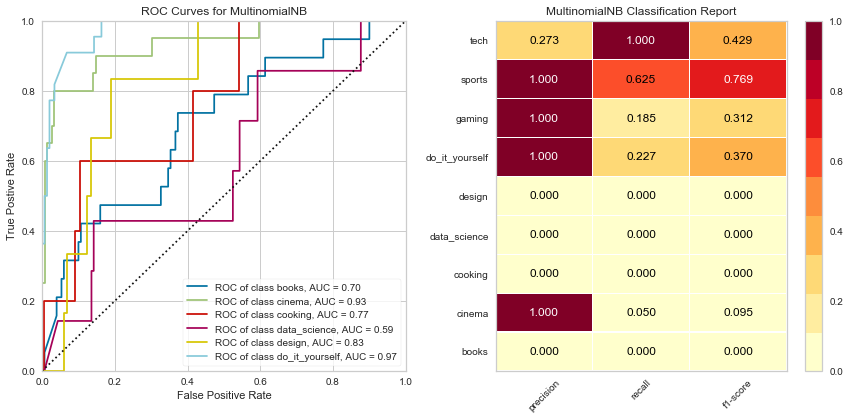

In [93]:
evaluate_model(MultinomialNB())

## Support Vector Machines 

Linear SVMs are widely used for text classification, though they can be slow to compute. SVMs draw "support vectors", orthogonal lines through high dimensional space against each of the classes. The use these vectors to compute a hyperplane that divides the space between the two classes with equal distance from each. 

/Users/benjamin/Workspace/ddl/brookings/venv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


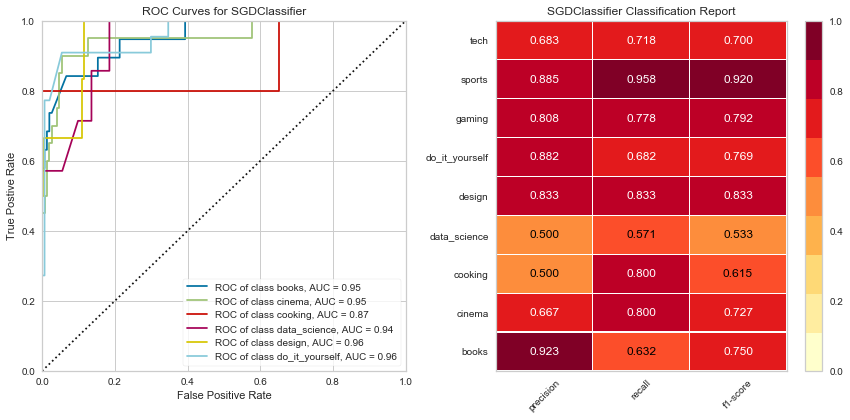

In [91]:
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier 

# Use SGD (stochastic gradient descent) for better performance on text
evaluate_model(SGDClassifier())

## Logistic Regression 

In text analysis is a substitute for maximum entropy models - uses the logit model to estimate the probability of a binary dependent variable. In multi-class classification uses one vs. rest or one vs. one to make computations.

/Users/benjamin/Workspace/ddl/brookings/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


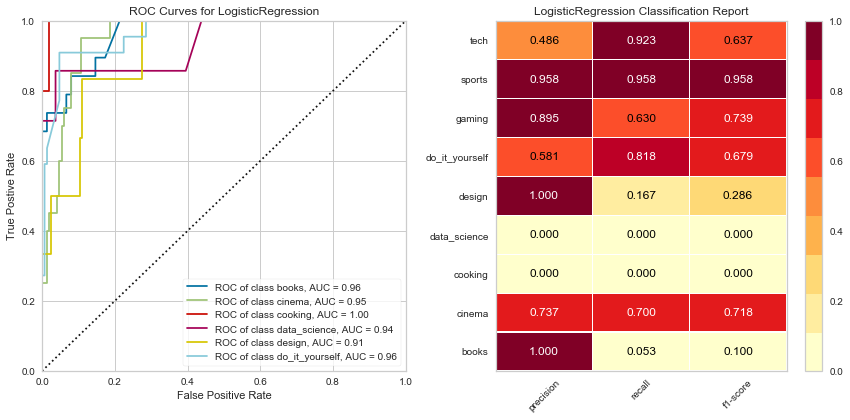

In [79]:
from sklearn.linear_model import LogisticRegression

evaluate_model(LogisticRegression())

## Decision Trees and Random Forests 

Use an inductive method to create a graphical tree of rules that can be used to make decisions. Random forests are the modern extension that uses an ensemble of weaker multiple trees, aggregating (bagging) them together to make a better global decision, or boosting the trees with a regression (gradient boosting) to weight the performance of individual models on their random subsets of data. 

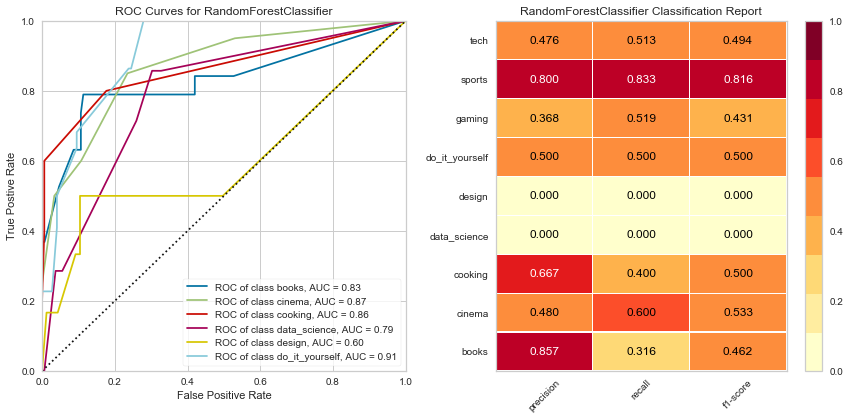

In [82]:
from sklearn.ensemble import RandomForestClassifier

evaluate_model(RandomForestClassifier())

## Artificial Neural Networks 

Inspired by biological neurons, ANNs are in fact universal function approximators that use a network of activating neurons based on input to make decisions. ANNs have been recently extended to multiple layers - deep learning and because of advances in computing power, are widely regarded as the state of the art for text processing.

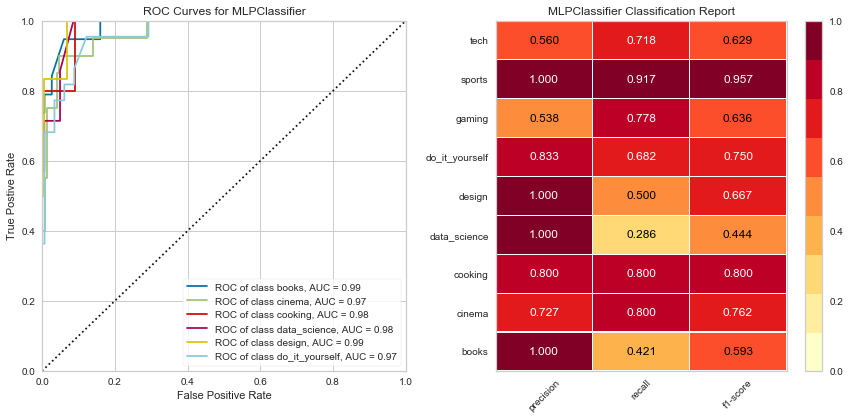

In [84]:
from sklearn.neural_network import MLPClassifier

evaluate_model(MLPClassifier())

## Other Visual Diagnostics 

- Class Balance 
- Class Prediction Error 
- Confusion Matrix 

/Users/benjamin/Workspace/ddl/brookings/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


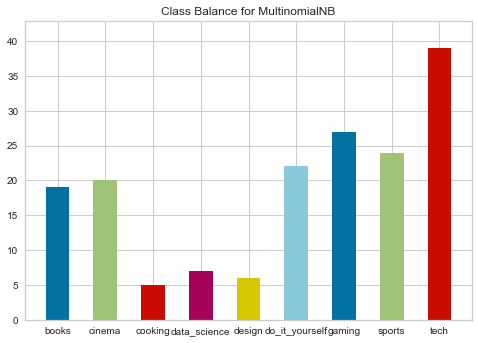

In [86]:
from yellowbrick.classifier import ClassBalance

viz = ClassBalance(MultinomialNB())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

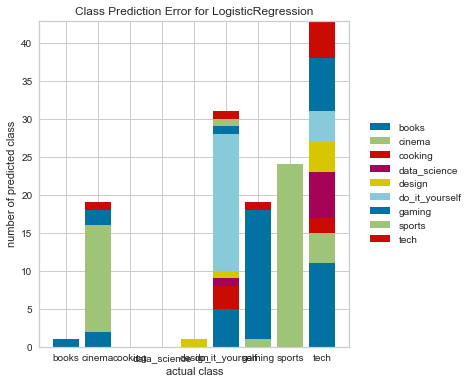

In [88]:
from yellowbrick.classifier import ClassPredictionError 

viz = ClassPredictionError(LogisticRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

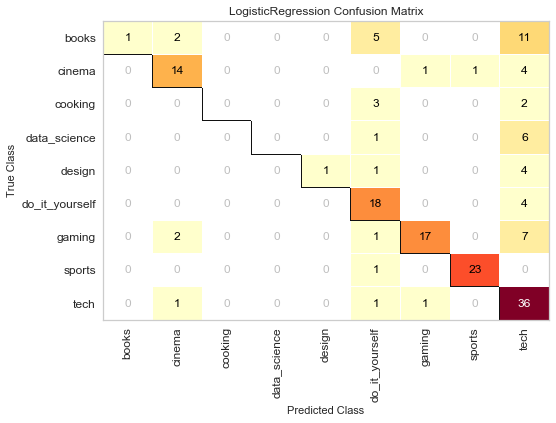

In [89]:
from yellowbrick.classifier import ConfusionMatrix 

viz = ConfusionMatrix(LogisticRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()